# Project Name - Hotel Booking Analysis


## Project type - EDA
Contribution - Ashsih Kumar(Individual)

# Problem Statement
1. Calculate percentage of cancelled and non-cancelled reservations and visualize it.
2. The adr is the average daily rate for a person's stay at the hotel. What is the mean adr across all the hotel stays in the dataset?
3. Which type of hotel has more cancelation ratio? Explain with the visualization.
4. What is the average total cost for a stay in the dataset? Not average daily cost, but total stay cost.
5. Calculate Average reservation per day with the help of graph.
6. Show reservation and cancelation ratio.
7. Name top countries with most cancelled reservation.

# **Project Summary -**
The data analysis of hotel booking shows various patterns and trends that provide insights into customer behavior and preferences. The data shows that Portugal accounts for the majority of cancellations. In general, City hotels charge more per person and per night than Resort hotels, with costs varied according to the season.

Groups and offline TA/TOs have higher cancellation rates than direct bookings, which have a lower cancellation rate. The number of visitors to city hotels increases throughout the year, with the spring and autumn experiencing the biggest numbers of visitors because of the highest prices.

Overall, the data analysis of hotel bookings provides valuable insights into customer behavior and preferences. These findings can help hotel managers make informed decisions about pricing, marketing, and customer service to enhance guest satisfaction and maximize revenue.









# **Git Hb Link**
https://github.com/Ashu61286/Hotel-Booking-Analysis.git






# Project Objective
Hotel Booking Analysis
The objective of this project is to carry out a thorough research of hotel reservation trends, with an emphasis on determining the most typical times for bookings and cancellations. In order to better comprehend the elements that contribute to this tendency, we also seek to ascertain the underlying causes of cancellations. We aim to give a thorough and objective evaluation of hotel booking behaviour through the use of data-driven insights and cutting-edge analytical methodologies. This evaluation may be used to guide strategic decision-making and improve overall business performance. 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from datetime import datetime


In [2]:
# Load Dataset
file_path="/content/drive/MyDrive/video/Hotel Bookings.csv"
df= pd.read_csv(file_path)

# Data Analysis and Cleaning

In [3]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
# Dataset Rows & Columns count
df.shape
print(f"total number of rows in given data set is {df.shape[0]}")
print(f"total number of columns in given data set is {df.shape[1]}")

total number of rows in given data set is 119390
total number of columns in given data set is 32


In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [9]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [10]:
for col in df.describe(include = 'object').columns:
  print(col)
  print(df[col].unique())
  print('_'*50)

hotel
['Resort Hotel' 'City Hotel']
__________________________________________________
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
__________________________________________________
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
__________________________________________________
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
# Drop the column because of to many null values
df.drop(["company", "agent"], axis = 1, inplace =True)
df.dropna(inplace = True)

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [14]:
df = df[df['adr']<5000]

# Analysis and Visualization 

In [15]:
cancel_bookings = df['is_canceled'].value_counts(normalize = True) *100
cancel_bookings

0    62.865337
1    37.134663
Name: is_canceled, dtype: float64

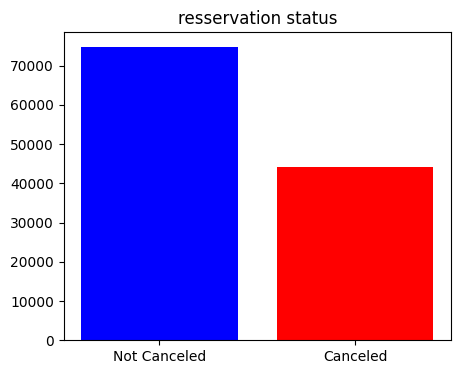

In [16]:
plt.figure(figsize = (5, 4))
plt.title("resservation status")
colors = ['blue', 'red']
plt.bar(['Not Canceled', 'Canceled'], df['is_canceled'].value_counts(), color=colors)
plt.show()

In [17]:
# mean adr across all the hotel stays
round(df['adr'].mean(),2)

101.96

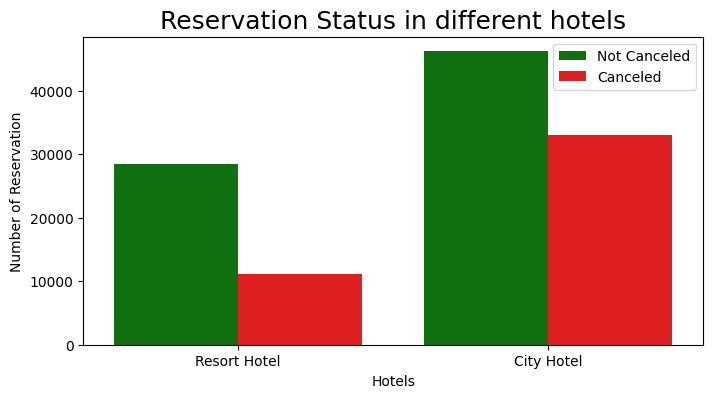

In [18]:
plt.figure(figsize = (8, 4))
axis1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette=['Green', 'red'])
legend_labels = axis1.get_legend_handles_labels()
green_line = mlines.Line2D([], [], color='green', label='Sine')
red_line = mlines.Line2D([], [], color='red', label='Cosine')
axis1.legend(handles=[green_line, red_line])
axis1.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.title('Reservation Status in different hotels', size = 18)
plt.xlabel('Hotels')
plt.ylabel('Number of Reservation')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

In [19]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True) *100

0    72.024952
1    27.975048
Name: is_canceled, dtype: float64

In [20]:
city_hotel = df[df['hotel']== 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True) *100

0    58.291825
1    41.708175
Name: is_canceled, dtype: float64

In [21]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

In [22]:
resort_hotel
city_hotel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


In [23]:
# average total cost for a stay
df['total_stay_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['total_spend'] = df['adr']*df['total_stay_nights']
round(df['total_spend'].mean(),2)

358.42

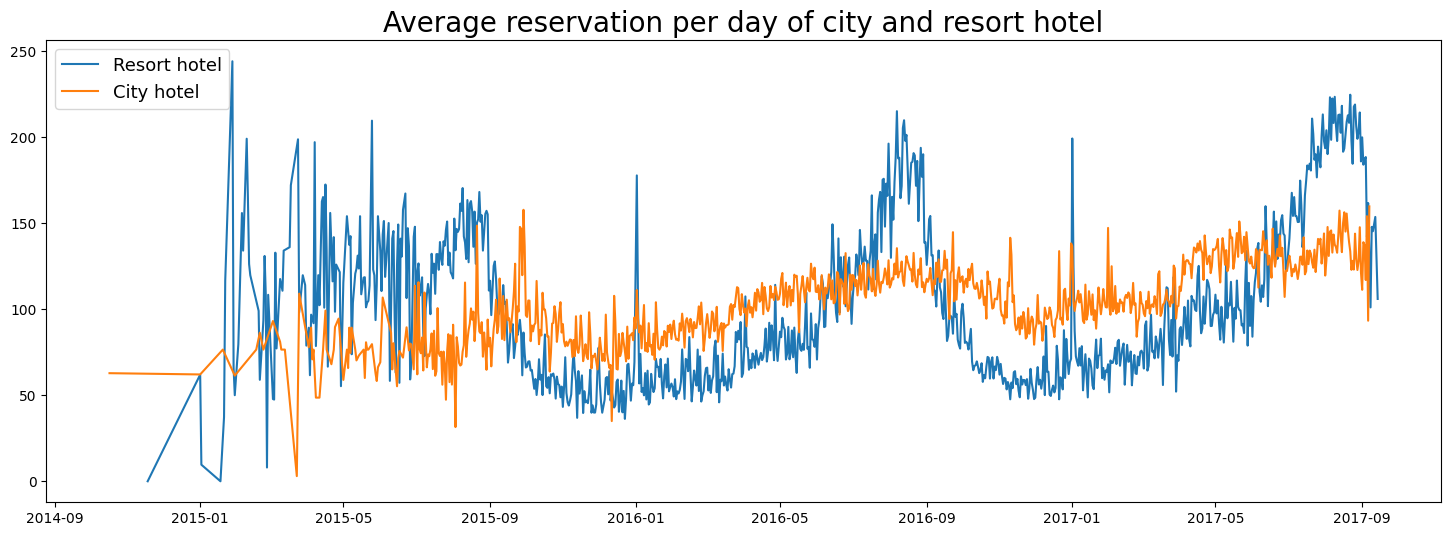

In [24]:
plt.figure(figsize = (18,6))
plt.title('Average reservation per day of city and resort hotel', fontsize = 20)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City hotel')
plt.legend(fontsize = 13)
plt.show()

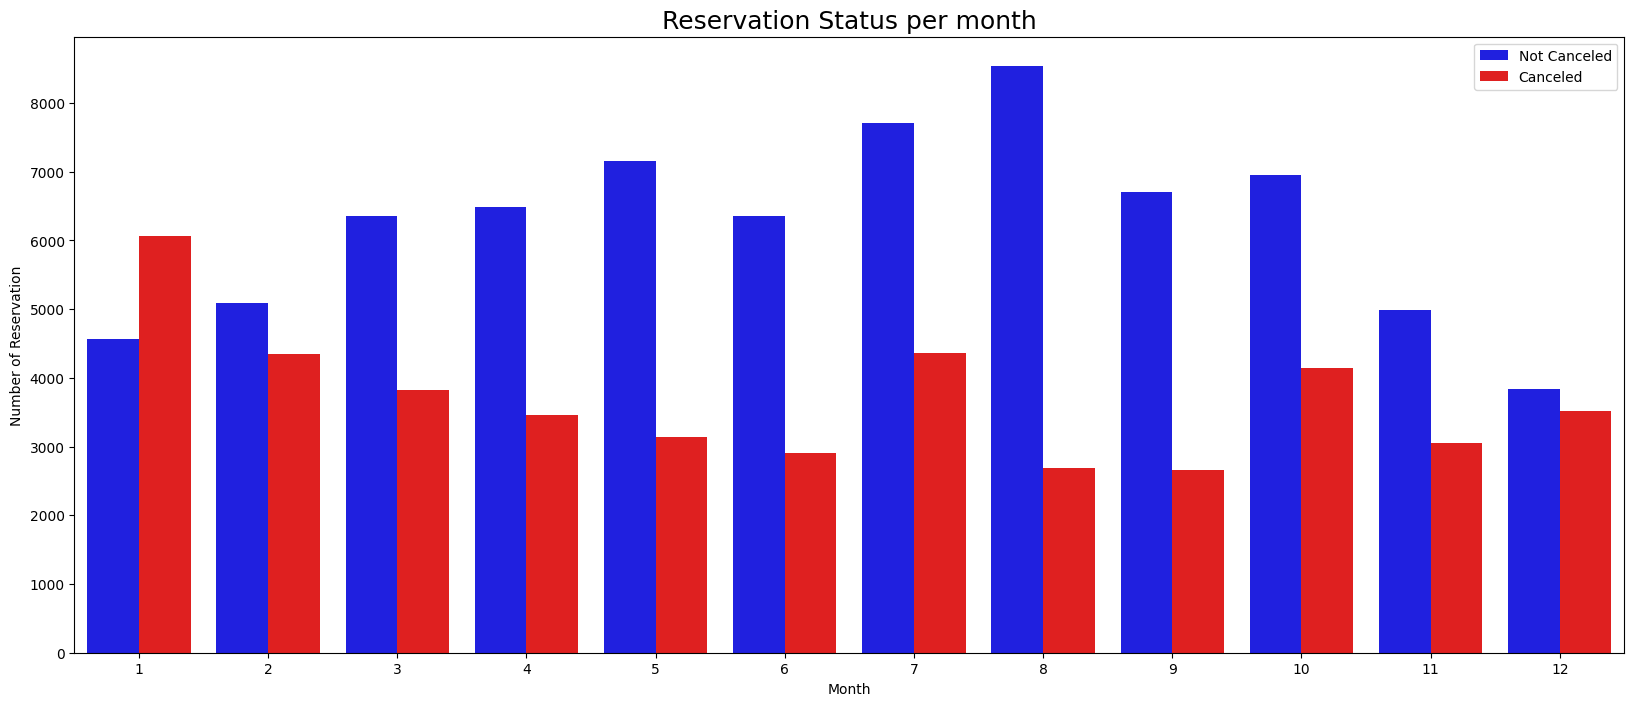

In [25]:
df['month'] = df["reservation_status_date"].dt.month
df['is_canceled_binary'] = df['is_canceled'].map({0: 'Not Canceled', 1: 'Canceled'})
plt.figure(figsize=(20, 8))
axis1 = sns.countplot(x='month', hue='is_canceled_binary', data=df, palette={'Not Canceled': 'blue', 'Canceled': 'red'})
legend_labels, _ = axis1.get_legend_handles_labels()
axis1.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation Status per month', size=18)
plt.xlabel('Month')
plt.ylabel('Number of Reservation')
plt.show()


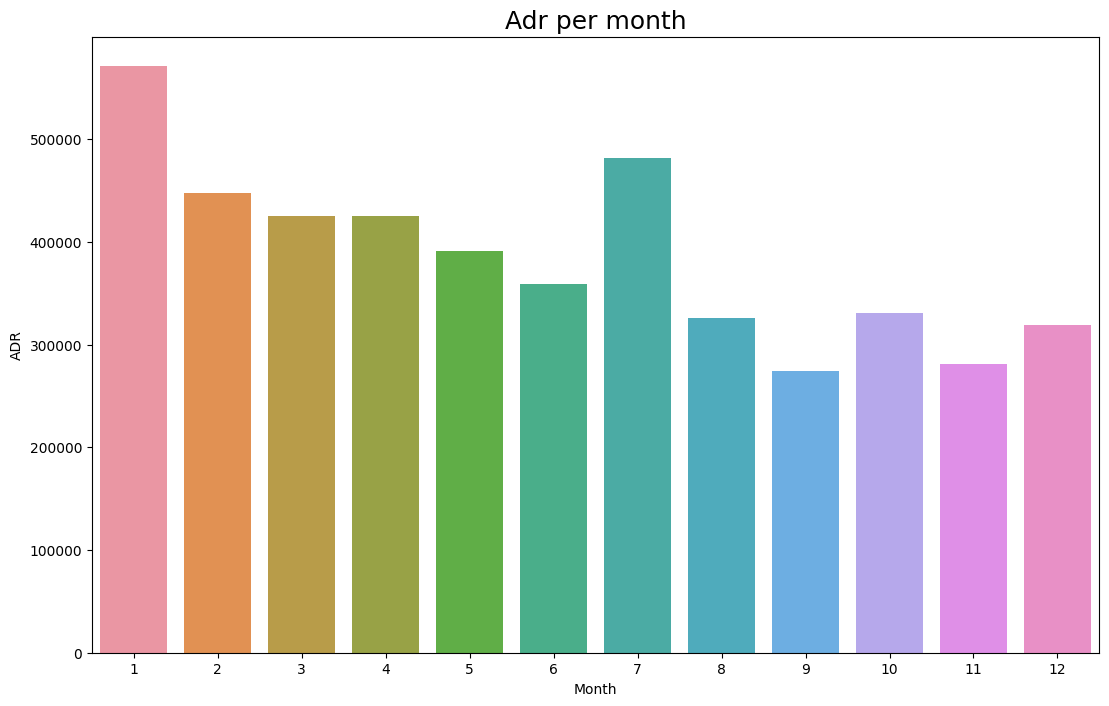

In [26]:
plt.figure(figsize=(13, 8))
plt.title('Adr per month', size=18)
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.xlabel('Month')
plt.ylabel('ADR')
plt.show()

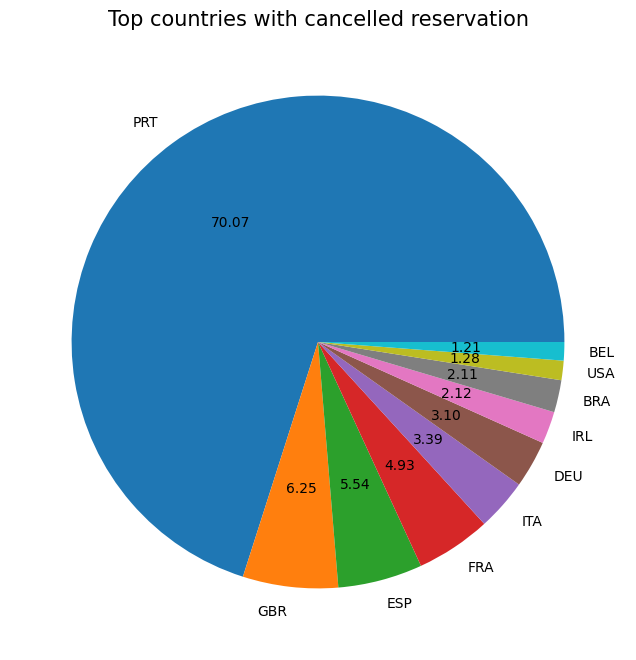

In [27]:
cancelled_data = df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (13,8))
plt.title('Top countries with cancelled reservation', size = 15)
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [28]:
df['market_segment'].value_counts(normalize = True) *100

Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: market_segment, dtype: float64

In [29]:
cancelled_data['market_segment'].value_counts(normalize = True) *100

Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: market_segment, dtype: float64

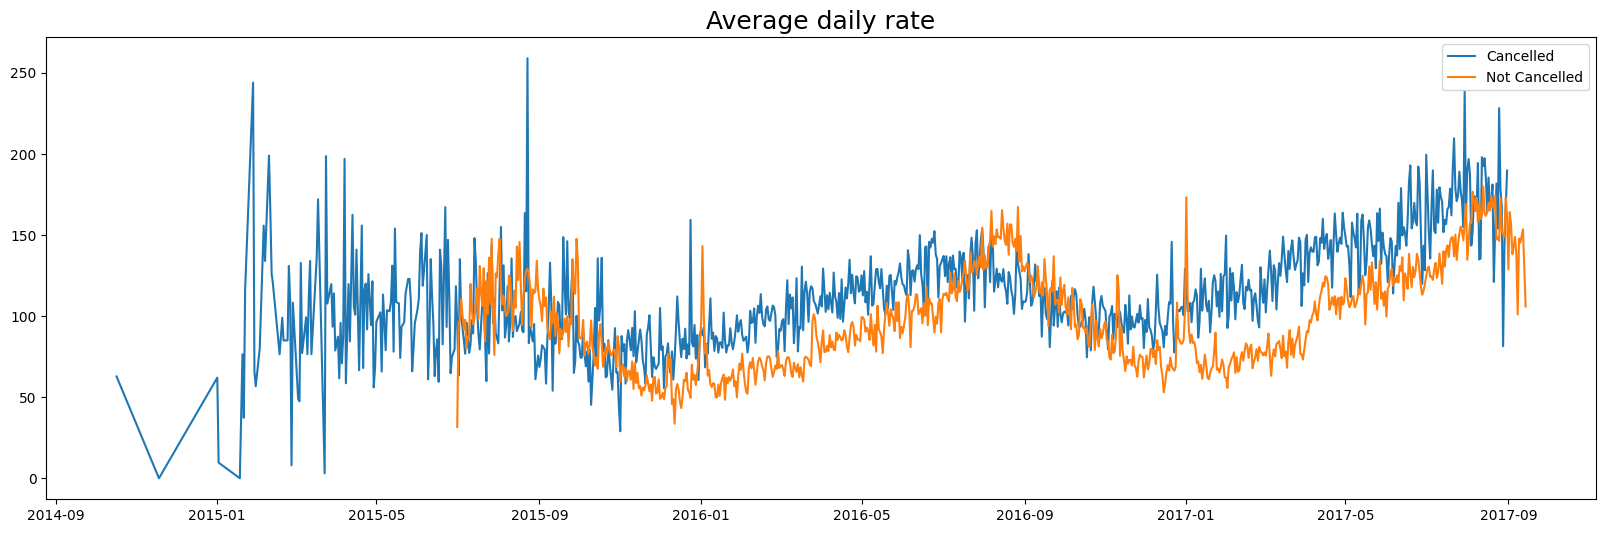

In [30]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = df[df['is_canceled']==0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average daily rate', size = 18)
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'Cancelled')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'Not Cancelled')
plt.legend(fontsize = 10)
plt.show()